In [74]:
# Dependencies
import openweathermapy.core as owm
from pprint import pprint
import random
import matplotlib.pyplot as plt
import numpy as np
from random import *


#build list of coordinates and cities
lats = []
lons = []
cities = []
names =[]

# build list of random 700 integers 
for x in range(1, 701):
    lats.append(randint(10,80))
    lons.append(-1*randint(40,170))

# zip lists together to build coordinate pairs
pairs = list(zip(lats,lons))

#use citipy to find nearest cities for random generated coordinates
for pair in pairs:
    lat, lon = pair
    cities.append(citipy.nearest_city(lat, lon))

for city in cities:
    country_code = city.country_code
    names.append(city.city_name)

# make sure I get data back
print(names)

['saint george', 'makakilo city', 'san quintin', 'port hardy', 'lavrentiya', 'bethel', 'yellowknife', 'chapais', 'yellowknife', 'hermiston', 'shasta lake', 'upernavik', 'hamilton', 'kapaa', 'kitimat', 'guerrero negro', 'hilo', 'fortuna', 'clyde river', 'kodiak', 'hilo', 'ketchikan', 'nanortalik', 'thompson', 'bethel', 'kodiak', 'humboldt', 'west bay', 'coos bay', 'sitka', 'ribeira grande', 'kapaa', 'brigantine', 'thompson', 'hilo', 'palmer', 'tuktoyaktuk', 'brigantine', 'yellowknife', 'tuktoyaktuk', 'qaanaaq', 'juneau', 'ribeira grande', 'torbay', 'guerrero negro', 'hilo', 'thompson', 'upernavik', 'xadani', 'the valley', 'cockburn town', 'kenai', 'barrow', 'monterey', 'louisbourg', 'victoria', 'yellowknife', 'saint-augustin', 'bathsheba', 'wichita falls', 'saint george', 'qaanaaq', 'frontera', 'lompoc', 'thompson', 'aklavik', 'narsaq', 'qaanaaq', 'barrow', 'bucyrus', 'ilulissat', 'clyde river', 'pacific grove', 'maicao', 'tahlequah', 'lompoc', 'north bend', 'saint george', 'kodiak', 'p

In [92]:
# build summary needed from weather api
summary = ["name", "main.temp", "main.humidity", "clouds.all", "wind.speed", 'coord.lon', 'coord.lat']

#build lists for storage
city_list = []
temp = []
humid = []
cloud = []
wind = []
lon = []
lat = []
count=0

# Create settings dictionary 
settings = {"units": "imperial", "appid": api_key}

# loop through city list to get weather and stuff
for city in names:
    
    # use exception handling for cities that cannot be found
    try:
        city_data = owm.get_current(city, **settings)
        city_list.append(city_data("name"))
        temp.append(city_data("main.temp"))
        humid.append(city_data("main.humidity"))
        cloud.append(city_data("clouds.all"))
        wind.append(city_data("wind.speed"))
        lat.append(city_data("coord.lat"))
        lon.append(city_data("coord.lon"))
    except:
        count = count + 1
        print('missed ' + str(count))

missed1
missed2
missed3
missed4
missed5
missed6
missed7
missed8
missed9
missed10
missed11
missed12
missed13
missed14
missed15


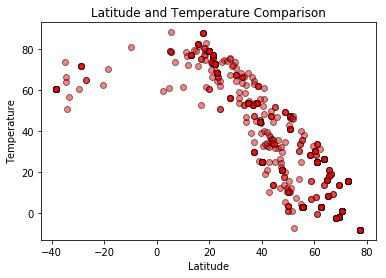

In [97]:
# plot some data
plt.scatter(lat, temp, marker="o", facecolors="red", edgecolors="black", alpha=.5)
plt.title("Latitude and Temperature Comparison")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("Lat and Temp.png")

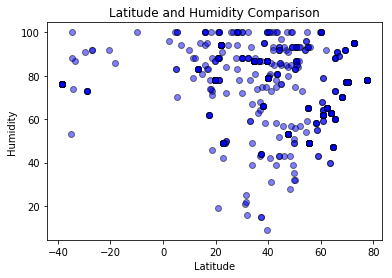

In [98]:
# plot some data
plt.scatter(lat, humid, marker="o", facecolors="blue", edgecolors="black", alpha=.5)
plt.title("Latitude and Humidity Comparison")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Lat and Humidity.png")

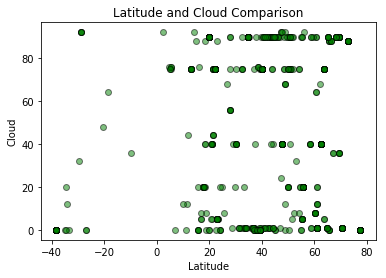

In [99]:
# plot some data
plt.scatter(lat, cloud, marker="o", facecolors="green", edgecolors="black", alpha=.5)
plt.title("Latitude and Cloud Comparison")
plt.xlabel("Latitude")
plt.ylabel("Clouds")
plt.savefig("Lat and Cloud.png")

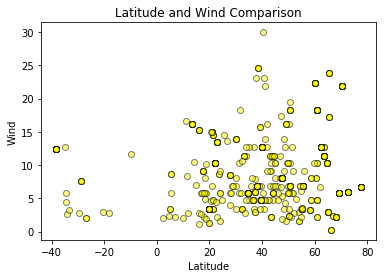

In [100]:
# plot some data
plt.scatter(lat, wind, marker="o", facecolors="yellow", edgecolors="black", alpha=.5)
plt.title("Latitude and Wind Comparison")
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.savefig("Lat and Wind.png")

In [113]:
# zip city data together
cities_output = list(zip(city_list,temp,humid,cloud,wind,lon,lat))

# write city data to csv
np.savetxt("hw.csv", cities_output, delimiter=",", fmt='%s')